# LOB-CNN v0

- 复现论文

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

    
import os
import time
from datetime import datetime
import glob

# Data Processing

### 从磁盘中取数并存为 CSV
Retrieve data from disk and save as CSV

In [2]:
code_list = [
    '000002sz', '000063sz', '000651sz', '000858sz', '002460sz', 
    '002594sz', '002841sz', '300144sz', '300498sz', '600111sh', 
    '600309sh', '600398sh', '600436sh', '600585sh', '600893sh', 
    '600900sh', '601088sh', '601100sh', '601360sh', '603986sh'
]

In [9]:
# 获取 ~/ 目录下所有 snap_stkhf202101_*.sas7bdat 文件
dfs = {}
for code in code_list:
    file_path = glob.glob(f'/mnt/sdb1/HF2021/L2HF2101_L2/snap_stkhf202101_{code}.sas7bdat')
    if file_path:
        dfs[code] = pd.read_sas(file_path[0], format='sas7bdat', encoding='utf-8')
    else:
        print(f'{code} not found')

In [11]:
for code, df in dfs.items():
    # save to csv in current directory
    df.to_csv(f'rawdata_L2HF2101_L2/{code}.csv', index=False)
    print(f'{code}.csv saved. Shape: {df.shape}')

000002sz.csv saved. Shape: (100635, 91)
000063sz.csv saved. Shape: (100667, 91)
000651sz.csv saved. Shape: (100637, 91)
000858sz.csv saved. Shape: (100686, 91)
002460sz.csv saved. Shape: (100676, 91)
002594sz.csv saved. Shape: (100690, 91)
002841sz.csv saved. Shape: (85052, 91)
300144sz.csv saved. Shape: (99668, 91)
300498sz.csv saved. Shape: (100099, 91)
600111sh.csv saved. Shape: (103263, 110)
600309sh.csv saved. Shape: (102216, 110)
600398sh.csv saved. Shape: (91210, 110)
600436sh.csv saved. Shape: (101798, 110)
600585sh.csv saved. Shape: (103044, 110)
600893sh.csv saved. Shape: (103538, 110)
600900sh.csv saved. Shape: (102386, 110)
601088sh.csv saved. Shape: (102041, 110)
601100sh.csv saved. Shape: (102086, 110)
601360sh.csv saved. Shape: (102437, 110)
603986sh.csv saved. Shape: (102523, 110)


- 上交所的数据比深交所的多一些特征列

### 分析原始数据
Rawdata analysis

In [2]:
df1 = pd.read_csv('rawdata_L2HF2101_L2/600436sh.csv')
df2 = pd.read_csv('rawdata_L2HF2101_L2/000002sz.csv')

In [3]:
df1.describe()

,Exchflg,Code,QTime,PrevClPr,OpPr,HiPr,LoPr,Tprice,Tvolume,Tsum,...,EtfSellDeals,EtfSellVol,EtfSellSum,ClPr,Absspread,Respread,Abseffspread,Reeffspread,Depth1,Depth2
count,101798.0,101798.0,101798.000000,101798.000000,99094.000000,99114.000000,99114.000000,99114.000000,101798.000000,1.017980e+05,...,101798.0,101798.0,101798.0,817.000000,101141.000000,101141.000000,99094.000000,99094.000000,1.011410e+05,1.011410e+05
mean,1.0,600436.0,43902.869271,293.492597,293.593189,300.332681,288.897311,294.957663,964.307855,2.840893e+05,...,0.0,0.0,0.0,295.091028,0.134145,0.000455,0.149508,0.000507,9.727098e+05,3.163178e+06
std,0.0,0.0,6772.457552,9.783258,9.337013,8.085276,8.118138,7.612282,2095.686337,6.163191e+05,...,0.0,0.0,0.0,7.778306,0.165582,0.000563,0.194061,0.000660,2.685786e+06,4.019648e+06
min,1.0,600436.0,31509.000000,267.510000,272.430000,272.430000,269.000000,269.340000,0.000000,0.000000e+00,...,0.0,0.0,0.0,279.980000,0.000000,0.000000,0.000000,0.000000,2.126645e+04,5.859800e+04
25%,1.0,600436.0,37586.000000,286.510000,288.800000,294.680000,282.690000,291.240000,100.000000,2.973500e+04,...,0.0,0.0,0.0,293.200000,0.020000,0.000068,0.020000,0.000070,1.452620e+05,1.315151e+06
50%,1.0,600436.0,41397.000000,294.450000,294.980000,300.000000,290.010000,296.310000,400.000000,1.168625e+05,...,0.0,0.0,0.0,296.380000,0.070000,0.000239,0.080000,0.000267,2.970160e+05,2.042675e+06
75%,1.0,600436.0,50329.750000,297.990000,299.550000,304.700000,294.800000,299.030000,1000.000000,2.999908e+05,...,0.0,0.0,0.0,299.550000,0.190000,0.000636,0.200000,0.000673,6.846663e+05,3.403903e+06
max,1.0,600436.0,56396.000000,312.500000,312.500000,318.830000,312.500000,318.830000,87800.000000,2.717410e+07,...,0.0,0.0,0.0,312.500000,1.980000,0.007293,2.600000,0.008736,5.434820e+07,5.926382e+07


In [15]:
df1.dtypes

Exchflg                float64
Code                     int64
Code_Mkt                object
Qdate                   object
QTime                  float64
                     ...      
Abseffspread           float64
Reeffspread            float64
Depth1                 float64
Depth2                 float64
datetime        datetime64[ns]
Length: 111, dtype: object

In [4]:
df2.describe()

,Exchflg,Code,QTime,PrevClPr,OpPr,HiPr,LoPr,Tprice,Tvolume,Tsum,...,WghtAvgBidPr,TotAskVol,WghtAvgAskPr,TOpenInterest,Absspread,Respread,Abseffspread,Reeffspread,Depth1,Depth2
count,100635.0,100635.0,100635.000000,100635.000000,98699.000000,98699.000000,98699.000000,100001.000000,1.006350e+05,1.006350e+05,...,98699.000000,1.006350e+05,98699.000000,0.0,99992.000000,99992.000000,99992.000000,99992.000000,9.999200e+04,9.999200e+04
mean,2.0,2.0,43995.030914,29.493645,29.479998,29.833307,29.085432,29.414006,2.149687e+04,6.334248e+05,...,28.741170,9.368178e+06,30.580286,NaN,0.012513,0.000425,0.013422,0.000456,1.865124e+06,1.196382e+07
std,0.0,0.0,6788.499509,0.917600,0.899008,1.009963,0.978734,1.028358,4.205978e+04,1.243849e+06,...,0.947754,3.355358e+06,1.027587,NaN,0.006834,0.000231,0.009998,0.000338,3.459330e+06,8.646369e+06
min,2.0,2.0,29409.000000,27.780000,27.780000,27.780000,27.100000,27.120000,0.000000e+00,0.000000e+00,...,26.810000,0.000000e+00,28.330000,NaN,0.000000,0.000000,0.000000,0.000000,4.389500e+03,5.582000e+03
25%,2.0,2.0,37668.000000,28.750000,28.990000,29.070000,28.400000,28.610000,4.200000e+03,1.247430e+05,...,27.960000,7.054814e+06,29.950000,NaN,0.010000,0.000333,0.010000,0.000333,4.224222e+05,6.412785e+06
50%,2.0,2.0,42240.000000,29.400000,29.500000,29.950000,29.270000,29.600000,1.040000e+04,3.057640e+05,...,28.940000,8.780281e+06,30.790000,NaN,0.010000,0.000342,0.010000,0.000342,9.856190e+05,9.773882e+06
75%,2.0,2.0,50346.000000,29.950000,29.980000,30.700000,29.830000,30.080000,2.360000e+04,6.953370e+05,...,29.370000,1.169615e+07,31.180000,NaN,0.010000,0.000360,0.010000,0.000361,2.130240e+06,1.484451e+07
max,2.0,2.0,58743.000000,31.280000,31.190000,32.350000,31.190000,32.340000,1.758600e+06,5.497384e+07,...,30.970000,1.715052e+07,33.220000,NaN,0.120000,0.003851,0.440000,0.013973,9.527898e+07,9.527898e+07


In [12]:
print("df1.shape, df1.columns: ", df1.shape, df1.columns.to_list())
print("df2.shape, df2.columns: ", df2.shape, df2.columns.to_list())

# print col in df1.columns but not in df2.columns
col_not_in_df2 = []
for col in df1.columns:
    if col not in df2.columns:
        col_not_in_df2.append(col)

# print col in df2.columns but not in df1.columns
col_not_in_df1 = []
for col in df2.columns:
    if col not in df1.columns:
        col_not_in_df1.append(col)

print("上交所的数据比深交所的多特征列: ", len(col_not_in_df2), col_not_in_df2)
print("深交所的数据比上交所的多特征列: ", len(col_not_in_df1), col_not_in_df1)

df1.shape, df1.columns:  (101798, 110) ['Exchflg', 'Code', 'Code_Mkt', 'Qdate', 'QTime', 'InstrumentStatus', 'PrevClPr', 'OpPr', 'HiPr', 'LoPr', 'Tprice', 'Tvolume', 'Tsum', 'Tdeals', 'TVolume_accu', 'TSum_accu', 'Tdeals_accu', 'BidPr1', 'BidVol1', 'BidPr2', 'BidVol2', 'BidPr3', 'BidVol3', 'BidPr4', 'BidVol4', 'BidPr5', 'BidVol5', 'AskPr1', 'AskVol1', 'AskPr2', 'AskVol2', 'AskPr3', 'AskVol3', 'AskPr4', 'AskVol4', 'AskPr5', 'AskVol5', 'BidPr6', 'BidVol6', 'BidPr7', 'BidVol7', 'BidPr8', 'BidVol8', 'BidPr9', 'BidVol9', 'BidPr10', 'BidVol10', 'AskPr6', 'AskVol6', 'AskPr7', 'AskVol7', 'AskPr8', 'AskVol8', 'AskPr9', 'AskVol9', 'AskPr10', 'AskVol10', 'BidDeals1', 'AskDeals1', 'BidDeals2', 'AskDeals2', 'BidDeals3', 'AskDeals3', 'BidDeals4', 'AskDeals4', 'BidDeals5', 'AskDeals5', 'BidDeals6', 'AskDeals6', 'BidDeals7', 'AskDeals7', 'BidDeals8', 'AskDeals8', 'BidDeals9', 'AskDeals9', 'BidDeals10', 'AskDeals10', 'TotBidVol', 'WghtAvgBidPr', 'TotAskVol', 'WghtAvgAskPr', 'IOPV_Interest', 'YldToMtrty

In [ ]:
non_numeric_cols = [
    'Code_Mkt', 'InstrumentStatus', 'TrdPhsCd', 'Trdirec'
]
for col in non_numeric_cols:
    print(df1[col].value_counts())
    print()

Code_Mkt
600436.SH    101798
Name: count, dtype: int64

InstrumentStatus
TRADE    96256
OCALL     2106
CCALL     1241
SUSP       771
ENDTR      700
START      580
CLOSE      144
Name: count, dtype: int64

TrdPhsCd
T111    96271
C111     2084
U111     1237
E110      826
P010      760
S 10      620
Name: count, dtype: int64

Trdirec
B    50939
S    47814
F     3045
Name: count, dtype: int64



### 列名解释
The meanings each entry stand for

以下是数据集中各列名的解释（基于常见金融数据缩写推测）：

1. **Exchflg**: Exchange Flag 交易所标志（如沪深市场标识）
2. **Code**: 证券代码（例中显示600436为片仔癀股票代码）
3. **Code_Mkt**: 证券代码+市场类型（如SH/SZ后缀）
4. **Qdate**: Quote Date 行情日期
5. **QTime**: Quote Time 行情时间
6. **InstrumentStatus**: 证券交易状态（如停牌/正常）
7. **PrevClPr**: Previous Close Price 前收盘价
8. **OpPr**: Open Price 开盘价
9. **HiPr**: High Price 最高价
10. **LoPr**: Low Price 最低价
11. **Tprice**: Trade Price 最新成交价
12. **Tvolume**: Trade Volume 成交量（股数）
13. **Tsum**: Trade Sum 成交金额（元）
14. **Tdeals**: Trade Deals 成交笔数
15. **TVolume_accu**: 累计成交量
16. **TSum_accu**: 累计成交金额
17. **Tdeals_accu**: 累计成交笔数
18. **BidPr1-10**: 买1到买10档位价格
19. **BidVol1-10**: 买1到买10档位挂单量
20. **AskPr1-10**: 卖1到卖10档位价格
21. **AskVol1-10**: 卖1到卖10档位挂单量
22. **BidDeals1-10**: 各买档位成交笔数
23. **AskDeals1-10**: 各卖档位成交笔数
24. **TotBidVol**: 总买盘挂单量
25. **WghtAvgBidPr**: 加权平均买价
26. **TotAskVol**: 总卖盘挂单量
27. **WghtAvgAskPr**: 加权平均卖价
28. **IOPV_Interest**: ETF参考净值
29. **YldToMtrty**: Yield to Maturity 到期收益率（债券类）
30. **WithDraw***: 撤单相关指标（撤买/撤卖笔数、量、金额）
31. **TotBidDeals**: 总买成交笔数
32. **TotAskDeals**: 总卖成交笔数
33. **NumBidOrders**: 买方向订单总数
34. **NumAskOrders**: 卖方向订单总数
35. **BidTrdMaxDrtn**: 买方最长交易持续时间
36. **AskTrdMaxDrtn**: 卖方最长交易持续时间
37. **EtfBuy/Sell***: ETF申赎相关指标
38. **ClPr**: Close Price 收盘价
39. **TrdPhsCd**: Trade Phase Code 交易阶段代码
40. **Trdirec**: Trade Direction 交易方向
41. **Absspread/Respread**: 绝对/相对买卖价差
42. **Abseffspread/Reeffspread**: 绝对/相对有效价差
43. **Depth1/Depth2**: 市场深度（可能指5档/10档深度）
44. **datetime**: 日期时间（整合Qdate和QTime）

**注**：数据特征显示这是中国A股高频交易数据（从ETF字段和600436股票代码可见），部分字段如IOPV、ETF相关指标表明可能包含ETF套利数据。Describe显示所有EtfSell相关指标为0，说明该证券可能不是ETF产品但市场包含ETF交易信息。

以下是针对各非数值型字段中每个取值的详细解释（基于中国证券市场常见术语推测）：

**InstrumentStatus（证券交易状态）**
| 值      | 含义                         | 阶段说明                           |
|---------|-----------------------------|----------------------------------|
| TRADE   | 连续交易阶段                 | 正常交易时段（可自由买卖）        |
| OCALL   | Opening Call Auction        | **开盘集合竞价阶段**（9:15-9:25） |
| CCALL   | Closing Call Auction        | **收盘集合竞价阶段**（14:57-15:00）|
| SUSP    | Suspension                  | 停牌（临时或长期无法交易）        |
| ENDTR   | End of Trading              | 交易结束（收盘后状态）            |
| START   | Pre-opening Preparation     | 开盘前准备阶段（可能为9:15前）    |
| CLOSE   | Post-closing Settlement     | 收盘后清算阶段                    |

**TrdPhsCd（交易阶段代码）**
| 值     | 含义（推测）                  | 对应时段/事件                     |
|--------|-----------------------------|----------------------------------|
| T111   | **连续交易阶段**             | 上午/下午连续竞价（如9:30-11:30, 13:00-14:57）|
| C111   | 收盘集合竞价阶段              | 14:57-15:00                     |
| U111   | 午间休市（Unavailable）       | 11:30-13:00                     |
| E110   | 临时停牌（如熔断）            | 价格波动触发的暂停交易           |
| P010   | 盘后固定价格交易（科创板/创业板）| 15:05-15:30                     |
| S 10   | 系统测试或特殊时段            | 非交易时间系统维护               |

**Trdirec（交易方向标识）**
| 值  | 含义                          | 说明                              |
|-----|-----------------------------|----------------------------------|
| B   | **Buy**（买方主动成交）       | 以卖一价成交，推动价格上涨        |
| S   | **Sell**（卖方主动成交）      | 以买一价成交，推动价格下跌        |
| F   | **Fix/Neutral**（中性方向）   | 可能为：<br>- 集合竞价匹配成交<br>- 撤单<br>- 系统内部对冲交易 |

**注意事项**
1. **数据特征**：  
   - `EtfSellDeals`等ETF相关字段全为0，结合`Code=600436`可知，这是**股票**（片仔癀）的高频交易数据，但数据集中保留了ETF相关字段（可能为统一模板）。
   - `TrdPhsCd`中的代码需参考交易所官方文档（如上交所[交易阶段代码表](http://www.sse.com.cn/)）确认精确含义。

2. **交易阶段扩展知识**：  
   - **熔断阶段**（E110）：当指数波动超过阈值时触发的全市场暂停交易（中国A股当前已取消指数熔断，但个股涨跌停仍存在）。
   - **盘后固定价格交易**（P010）：科创板/创业板特有机制，允许收盘后以固定价格交易。

建议在实际分析中结合具体时间戳（`QTime`字段）验证阶段划分是否符合交易所规则。

### 保存预处理完的数据
Save pre-processed data to `data_202101` folder

In [4]:
level2_col_list = []
for l in range(1, 11):
    BidPr_col = f'BidPr{l}'
    BidVol_col = f'BidVol{l}'
    AskPr_col = f'AskPr{l}'
    AskVol_col = f'AskVol{l}'
    level2_col_list.extend([BidPr_col, BidVol_col, AskPr_col, AskVol_col])
# level2_col_list

In [ ]:
used_cols = [
    'datetime', 'Exchflg', 'Code', 'Code_Mkt', 'Qdate', 'QTime', 'InstrumentStatus', 'Trdirec',
    'PrevClPr', 'OpPr', 'HiPr', 'LoPr', 'Tprice', 'Tvolume', 'Tsum', 'Tdeals', 'TVolume_accu', 'TSum_accu', 'Tdeals_accu',
    'TotBidVol', 'WghtAvgBidPr', 'TotAskVol', 'WghtAvgAskPr',
    'Absspread', 'Respread', 'Abseffspread', 'Reeffspread', 'Depth1', 'Depth2'
]
used_cols.extend(level2_col_list)

for code in code_list:
    df = pd.read_csv(f'rawdata_L2HF2101_L2/{code}.csv')

    # convert all df in dfs to datetime
    date = pd.to_datetime(df['Qdate'])
    time = pd.to_timedelta(df['QTime'], unit='s')
    df['datetime'] = date + time
    
    # select used cols
    df = df[used_cols]
    df.to_csv(f'data_202101/{code}.csv', index=False)
    print(f'{code}.csv saved. Shape: {df.shape}')


000002sz.csv saved. Shape: (100635, 69)
000063sz.csv saved. Shape: (100667, 69)
000651sz.csv saved. Shape: (100637, 69)
000858sz.csv saved. Shape: (100686, 69)
002460sz.csv saved. Shape: (100676, 69)
002594sz.csv saved. Shape: (100690, 69)
002841sz.csv saved. Shape: (85052, 69)
300144sz.csv saved. Shape: (99668, 69)
300498sz.csv saved. Shape: (100099, 69)
600111sh.csv saved. Shape: (103263, 69)
600309sh.csv saved. Shape: (102216, 69)
600398sh.csv saved. Shape: (91210, 69)
600436sh.csv saved. Shape: (101798, 69)
600585sh.csv saved. Shape: (103044, 69)
600893sh.csv saved. Shape: (103538, 69)
600900sh.csv saved. Shape: (102386, 69)
601088sh.csv saved. Shape: (102041, 69)
601100sh.csv saved. Shape: (102086, 69)
601360sh.csv saved. Shape: (102437, 69)
603986sh.csv saved. Shape: (102523, 69)


### 可视化分析
Data Visualisation

In [3]:
folder_path = 'data_202111/'
code1 = '000002sz'
df1 = pd.read_csv(folder_path + code1 + '.csv')

#### Time Slices & isNull

In [6]:
# Chinese stock market trading time
START_TRADE_T1 = pd.to_timedelta('09:30:00').total_seconds()
END_TRADE_T1 = pd.to_timedelta('11:30:00').total_seconds()
START_TRADE_T2 = pd.to_timedelta('13:00:00').total_seconds()
END_TRADE_T2 = pd.to_timedelta('14:57:00').total_seconds()

trading_time_mask_1 = (
    ((df1['QTime'] > START_TRADE_T1) & (df1['QTime'] < END_TRADE_T1)) |
    ((df1['QTime'] > START_TRADE_T2) & (df1['QTime'] < END_TRADE_T2))
)
df1 = df1[trading_time_mask_1]
df1.reset_index(drop=True, inplace=True)
df1['datetime'] = pd.to_datetime(df1['datetime'])
# df1.to_csv("try1.csv", index=False)

In [5]:
# calculate new features
df1['mid_price'] = (df1['BidPr1'] + df1['AskPr1']) / 2
df1['TWAP_mid'] = df1['mid_price'].rolling(window=5).mean()
df1.dropna(axis=0, inplace=True)
# df1['Tprice_calc'] = df1.apply(lambda x: x['Tsum'] / x['Tvolume'] if x['Tvolume'] != 0 else 0, axis=1)
# df1['VWAP_calc'] = df1.apply(lambda row: (row['TotBidVol']*row['WghtAvgBidPr']+row['TotAskVol']*row['WghtAvgAskPr'])\
#     /(row['TotBidVol']+row['TotAskVol'])\
#     if (row['TotBidVol']+row['TotAskVol']) != 0 else 0, axis=1)
# df1['VWAP_MA5'] = df1['VWAP_calc'].rolling(window=5).mean()

In [6]:
df1.columns, df1.shape

(Index(['datetime', 'Exchflg', 'Code', 'Code_Mkt', 'Qdate', 'QTime',
        'InstrumentStatus', 'Trdirec', 'PrevClPr', 'OpPr', 'HiPr', 'LoPr',
        'Tprice', 'Tvolume', 'Tsum', 'Tdeals', 'TVolume_accu', 'TSum_accu',
        'Tdeals_accu', 'TotBidVol', 'WghtAvgBidPr', 'TotAskVol', 'WghtAvgAskPr',
        'Absspread', 'Respread', 'Abseffspread', 'Reeffspread', 'Depth1',
        'Depth2', 'BidPr1', 'BidVol1', 'AskPr1', 'AskVol1', 'BidPr2', 'BidVol2',
        'AskPr2', 'AskVol2', 'BidPr3', 'BidVol3', 'AskPr3', 'AskVol3', 'BidPr4',
        'BidVol4', 'AskPr4', 'AskVol4', 'BidPr5', 'BidVol5', 'AskPr5',
        'AskVol5', 'BidPr6', 'BidVol6', 'AskPr6', 'AskVol6', 'BidPr7',
        'BidVol7', 'AskPr7', 'AskVol7', 'BidPr8', 'BidVol8', 'AskPr8',
        'AskVol8', 'BidPr9', 'BidVol9', 'AskPr9', 'AskVol9', 'BidPr10',
        'BidVol10', 'AskPr10', 'AskVol10', 'mid_price', 'TWAP_mid'],
       dtype='object'),
 (103917, 71))

In [ ]:
# Chinese stock market trading time
START_TRADE_T1 = pd.to_timedelta('09:30:00').total_seconds()
END_TRADE_T1 = pd.to_timedelta('11:30:00').total_seconds()
START_TRADE_T2 = pd.to_timedelta('13:00:00').total_seconds()
END_TRADE_T2 = pd.to_timedelta('14:57:00').total_seconds()

def trading_time_slice(df: pd.DataFrame):
    trading_time_mask = (
    ((df['QTime'] > START_TRADE_T1) & (df['QTime'] < END_TRADE_T1)) |
    ((df['QTime'] > START_TRADE_T2) & (df['QTime'] < END_TRADE_T2))
)
    df = df[trading_time_mask]
    df.reset_index(drop=True, inplace=True)
    # df['datetime'] = pd.to_datetime(df['datetime'])
    df.loc[:, 'datetime'] = pd.to_datetime(df['datetime'])
   
    return df

In [ ]:
code_list = [
    '000002sz', '000063sz', '000651sz', '000858sz', '002460sz', 
    '002594sz', '002841sz', '300144sz', '300498sz', '600111sh', 
    '600309sh', '600398sh', '600436sh', '600585sh', '600893sh', 
    '600900sh', '601088sh', '601100sh', '601360sh', '603986sh'
]

summary_stats = []
for code in code_list:
    df = pd.read_csv(f'data_202101/{code}.csv')
    df = trading_time_slice(df)
    # show nan values
    summary_stats.append(df.isnull().sum())
    
summary_stats_df = pd.concat(summary_stats, axis=1)
summary_stats_df.columns = code_list
summary_stats_df.to_csv('isnull_summary_stats.csv')

#### Relative Price Bars

relative_prices max, min:  4.300000000000011 -3.0


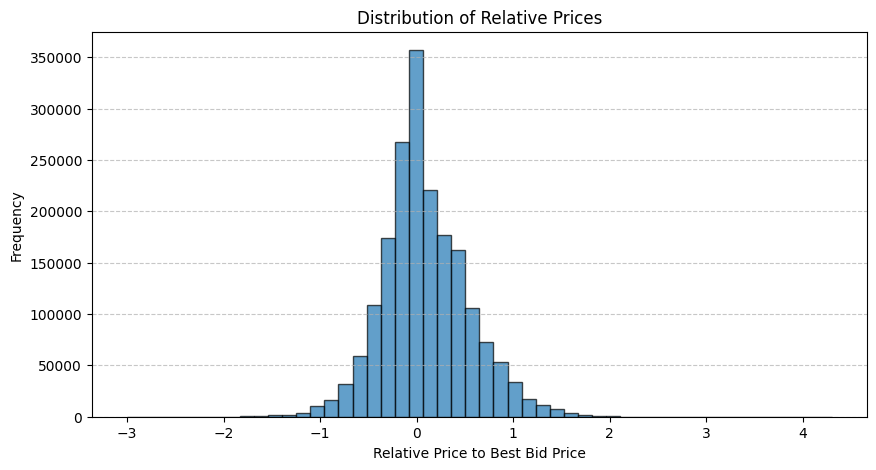

In [ ]:
# 假设 df1 已经加载，包含 BidPr1-BidPr10 和 AskPr1-AskPr10
bid_cols = [f'BidPr{i}' for i in range(1, 11)]
ask_cols = [f'AskPr{i}' for i in range(1, 11)]

# 计算 relative price to best bid price
df_relative = df1.copy()
best_bid = df1['BidPr1']

for col in bid_cols + ask_cols:
    df_relative[col] = df1[col] - best_bid

# 将所有 relative price 展开为一维数组
relative_prices = df_relative[bid_cols + ask_cols].values.flatten()
print("relative_prices max, min: ", relative_prices.max(), relative_prices.min())

# 绘制柱状图
plt.figure(figsize=(10, 5))
plt.hist(relative_prices, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Relative Price to Best Bid Price')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
def calculate_relative_prices(df, code=None, bin_width=50):
    """
    计算 relative price to best bid price，并绘制柱状图
    :param df: 包含 BidPr1-BidPr10 和 AskPr1-AskPr10 的 DataFrame
    :param bin_width: 柱状图的 bin 宽度，默认 50
    :return: relative_prices (一维 NumPy 数组)
    """
    bid_cols = [f'BidPr{i}' for i in range(1, 11)]
    ask_cols = [f'AskPr{i}' for i in range(1, 11)]

    df_relative = df.copy()
    best_bid = df['BidPr1']

    for col in bid_cols + ask_cols:
        df_relative[col] = df[col] - best_bid

    # 展开为一维数组
    df_relative.dropna(inplace=True)
    relative_prices = df_relative[bid_cols + ask_cols].values.flatten()

    # 绘制柱状图
    plt.figure(figsize=(10, 5))
    plt.hist(relative_prices, bins=bin_width, edgecolor='black', alpha=0.7)
    plt.xlabel('Relative Price to Best Bid Price')
    plt.ylabel('Frequency')
    plt.title(f'{code} Distribution of Relative Prices (Bin Width = {bin_width})')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # save the plot
    folder_path = 'relative_prices_plots/'
    plt.savefig(folder_path + f'{code}_relative_prices.png')
    
    return relative_prices


In [ ]:
code_list = [
    '000002sz', '000063sz', '000651sz', '000858sz', '002460sz', 
    '002594sz', '002841sz', '300144sz', '300498sz', '600111sh', 
    '600309sh', '600398sh', '600436sh', '600585sh', '600893sh', 
    '600900sh', '601088sh', '601100sh', '601360sh', '603986sh'
]

summary_stats = []

for code in code_list:
    df = pd.read_csv(f'data_202101/{code}.csv')
    df = trading_time_slice(df)
    # 计算 relative prices
    relative_prices = calculate_relative_prices(df, code)

    # 计算统计信息
    stats = {
        'code': code,
        'max': np.max(relative_prices),
        'min': np.min(relative_prices),
        'mean': np.mean(relative_prices),
        'median': np.median(relative_prices),
        'std': np.std(relative_prices),
        'abs_mean': np.mean(np.abs(relative_prices)),
        'abs_median': np.median(np.abs(relative_prices)),
        'abs_25%': np.percentile(np.abs(relative_prices), 25),
        'abs_75%': np.percentile(np.abs(relative_prices), 75),
        'abs_95%': np.percentile(np.abs(relative_prices), 95)
    }
    
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv("relative_price_summary.csv", index=False)

#### Label Proportion

In [8]:
def calc_label(snapshot_df, record_cnt, offset, mid_price, is_binary=True):
    """
    :param snapshot_df: DataFrame containing Level 2 data, shape[0] >= record_cnt + offset
    :param record_cnt: Number of records
    :param offset: Offset for return calculation
    :param mid_price: Mid price at the time of the last record in graph
    """
    df = snapshot_df.copy()
    df.reset_index(drop=True, inplace=True)
    diff = df.loc[record_cnt - 1 + offset, 'mid_price'] - mid_price
    diff = round(diff, 2)
    if is_binary:  # binary
        return 1 if diff >= 0.01 else 0
    else:  # multi-class
        return 1 if diff >= 0.01 else -1 if diff <= -0.01 else 0

In [12]:
code_list = [
    '000002sz', '000063sz', '000651sz', '000858sz', '002460sz', 
    '002594sz', '002841sz', '300144sz', '300498sz', '600111sh', 
    '600309sh', '600398sh', '600436sh', '600585sh', '600893sh', 
    '600900sh', '601088sh', '601100sh', '601360sh', '603986sh'
]

record_cnt = 5
is_binary = False

label_proportion = {}

for code in code_list:
    print(f'Processing {code}...')
    df = pd.read_csv(f'data_202101/{code}.csv')
    df = trading_time_slice(df)
    
    # 计算 mid_price
    df['mid_price'] = (df['BidPr1'] + df['AskPr1']) / 2
    
    # 计算 labels
    
    labels = []
    for i in range(len(df) - (record_cnt + 30)):
        snapshot_df = df.iloc[i:i + (record_cnt + 30), :]
        mid_price = snapshot_df.loc[i + record_cnt - 1, 'mid_price']
        ret5 = calc_label(snapshot_df, record_cnt, 5, mid_price, is_binary)
        ret30 = calc_label(snapshot_df, record_cnt, 30, mid_price, is_binary)
        labels.append([ret5, ret30])
    labels_df = pd.DataFrame(labels, columns=['ret5', 'ret30'])
 
    print("ret5: ", labels_df['ret5'].value_counts())
    print("ret30: ", labels_df['ret30'].value_counts())   
    if is_binary:
        label_proportion[code] = {
            "0_ret5": labels_df['ret5'].value_counts()[0], 
            "1_ret5": labels_df['ret5'].value_counts()[1],
            "0_ret30": labels_df['ret30'].value_counts()[0],
            "1_ret30": labels_df['ret30'].value_counts()[1]
            }
    else:
        label_proportion[code] = {
            "-1_ret5": labels_df['ret5'].value_counts()[-1], 
            "0_ret5": labels_df['ret5'].value_counts()[0], 
            "1_ret5": labels_df['ret5'].value_counts()[1],
            "-1_ret30": labels_df['ret30'].value_counts()[-1],
            "0_ret30": labels_df['ret30'].value_counts()[0],
            "1_ret30": labels_df['ret30'].value_counts()[1]
            }

label_proportion_df = pd.DataFrame(label_proportion).T
label_proportion_df.columns = ['0_ret5', '1_ret5', '0_ret30', '1_ret30'] if is_binary\
    else ['-1_ret5', '0_ret5', '1_ret5', '-1_ret30', '0_ret30', '1_ret30']
label_type = 'Binary' if is_binary else 'MultiClass'
label_proportion_df.to_csv(f'label_proportion_{label_type}.csv')


Processing 000002sz...
ret5:  ret5
-1    33802
 1    32360
 0    28562
Name: count, dtype: int64
ret30:  ret30
-1    43183
 1    39816
 0    11725
Name: count, dtype: int64
Processing 000063sz...
ret5:  ret5
-1    37276
 1    34636
 0    22813
Name: count, dtype: int64
ret30:  ret30
-1    46687
 1    40923
 0     7115
Name: count, dtype: int64
Processing 000651sz...
ret5:  ret5
-1    38362
 1    35524
 0    20839
Name: count, dtype: int64
ret30:  ret30
-1    46955
 1    40588
 0     7182
Name: count, dtype: int64
Processing 000858sz...
ret5:  ret5
 1    43792
-1    42573
 0     8360
Name: count, dtype: int64
ret30:  ret30
-1    46614
 1    46323
 0     1788
Name: count, dtype: int64
Processing 002460sz...
ret5:  ret5
-1    45290
 1    44409
 0     5026
Name: count, dtype: int64
ret30:  ret30
-1    47087
 1    46451
 0     1187
Name: count, dtype: int64
Processing 002594sz...
ret5:  ret5
 1    45408
-1    45265
 0     4052
Name: count, dtype: int64
ret30:  ret30
-1    47203
 1    46453


# Imaging

按照文章 <i>Short-term stock price trend prediction with imaging high
frequency limit order book data</i> 的做法，但是
- 区间数 I = 2
- 每个区间中的档数 M = 10
- 第2个区间相邻两档的间隔 K = 10
- 因此总档数 (2MI + 1) = 41
- 一个快照的图片大小 H * W = 41 * 3


#### Mapping

- 1st interval: no scaling
    - Set of relative prices in the 1st positive interval $~S^+_1 = \{1,2,...,10\} $ 
    - Mapped into set of transformed relative prices ... $\~S^+_1 = \{1,2,...,10\} $ 

- 2nd interval: scaled smaller
    - the 2nd positive interval $S^+_2 = \{11-20, 21-30,...,91-100,101-110 \} $ 
    - Mapped into ... $\~S^+_2 = \{11,12,...,19,20\} $ 

In [60]:
PLOT_I = 2
PLOT_M = 10
PLOT_K = 10

def transformed_price(price: float, best_bid: float, tick_size=0.01) -> int:
    """
    将价格转换为相对于最佳买价的相对价格，然后缩放
    :param price: 价格
    :param best_bid: 最佳买价
    :return: 相对价格
    """
    rel_price = price - best_bid
    rel_price /= tick_size
    
    if rel_price >= - PLOT_M and rel_price <= PLOT_M:
        return round(rel_price)
    
    elif rel_price > PLOT_M:
        return min(20, round((rel_price - 1) // PLOT_K + PLOT_M))
        
    else:
        return max(-20, round(- ((abs(rel_price) - 1) // PLOT_K + PLOT_M)))



In [61]:
def display_image(entry):
    assert (type(entry) == list) and (len(entry) == 3), "Type error, expected a list with length of 3"
    plt.figure
    plt.imshow(entry[0], cmap=plt.get_cmap('gray'))
    plt.ylim((0,entry[0].shape[0]-1))
    plt.xlim((0,entry[0].shape[1]-1))
    plt.title(f'ret5: {entry[1]}\nret30: {entry[2]}')
    plt.show()
    

In [62]:
def plot_snapshot(snapshot: pd.Series):
    """
    绘制某一时刻的 Level 2 数据
    :param snapshot: 包含 Level 2 数据的 Series
    """
    bid_prices = snapshot[[f'BidPr{i}' for i in range(1, 11)]].values
    bid_volumes = snapshot[[f'BidVol{i}' for i in range(1, 11)]].values
    ask_prices = snapshot[[f'AskPr{i}' for i in range(1, 11)]].values
    ask_volumes = snapshot[[f'AskVol{i}' for i in range(1, 11)]].values
    
    # 绘制 Bid 和 Ask 价格
    plt.figure(figsize=(4, 2))
    # use histograms
    plt.bar(bid_prices, bid_volumes, width=0.01, color='b', alpha=0.7, label='Bid Prices')
    plt.bar(ask_prices, ask_volumes, width=0.01, color='r', alpha=0.7, label='Ask Prices')
    plt.xlabel('Price')
    plt.ylabel('Volume')
    plt.title(f'Level 2 Data at Time {snapshot["datetime"]}')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

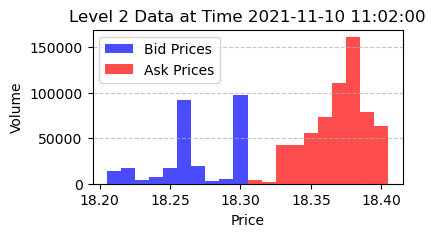

ask_list: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bid_list: [0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


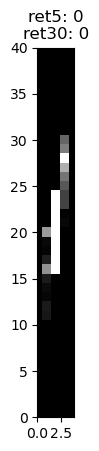

In [63]:
# Try one single snapshot

image_size = (41, 3)
image = np.zeros(image_size)

snapshot = df1.iloc[35000]
plot_snapshot(snapshot)
best_bid = snapshot['BidPr1']

ask_trans_p_list = []
bid_trans_p_list = []
ask_v_list = []
bid_v_list = []
for i in range(10):
    ask_trans_p_list.append(transformed_price(snapshot[f'AskPr{i+1}'], best_bid))
    bid_trans_p_list.append(transformed_price(snapshot[f'BidPr{i+1}'], best_bid))
    ask_v_list.append(snapshot[f'AskVol{i+1}'])
    bid_v_list.append(snapshot[f'BidVol{i+1}'])

# draw price line: level-5
image[20+bid_trans_p_list[4]:20+ask_trans_p_list[4], 1] = 255
# draw bid/ask levels: level-10
v_max = max(max(ask_v_list), max(bid_v_list))
for i in range(10):
    image[20+bid_trans_p_list[i], 0] += bid_v_list[i] / v_max * 255
    image[20+ask_trans_p_list[i], 2] += ask_v_list[i] / v_max * 255

# for any pixel in image, if it's value is larger than 255, set it to 255
image[image > 255] = 255

# add a column of zeros to the left and right of the image
image = np.concatenate([np.zeros((image_size[0], 1)), image, np.zeros((image_size[0], 1))], axis=1)

print("ask_list:", ask_trans_p_list)
print("bid_list:", bid_trans_p_list)

ret5 = 0
ret30 = 0
entry = [image, ret5, ret30]

display_image(entry)

In [64]:
def single_image(snapshot_df: pd.DataFrame, record_cnt=5) -> list:
    """
    生成单张图像
    :param snapshot_df: 包含 Level 2 数据的 DataFrame, shape[0] >= record_cnt + 30 
    :param record_cnt: 记录数量
    :return: list in the form of [np.array(image_size), binary, binary]. The binaries (0./1.) are the label of ret5, ret30
    
    Note: A single record's data occupies 3 pixels (width)
    
    """
    assert snapshot_df.shape[0] >= record_cnt + 30, "Error: expected snapshot_df.shape[0] < record_cnt + 30"
    
    image_size = (41, 3*record_cnt)
    image = np.zeros(image_size)
    # current best bid and mid price
    snapshot_df.reset_index(drop=True, inplace=True)
    best_bid = snapshot_df.loc[record_cnt-1, 'BidPr1']
    mid_price = snapshot_df.loc[record_cnt-1, 'mid_price']
    
    for i in range(record_cnt):
        snapshot = snapshot_df.iloc[i]
        # plot_snapshot(snapshot)
        X_shift = 3*i
        
        ask_trans_p_list = []
        bid_trans_p_list = []
        ask_v_list = []
        bid_v_list = []
        for i in range(10):
            ask_trans_p_list.append(transformed_price(snapshot[f'AskPr{i+1}'], best_bid))
            bid_trans_p_list.append(transformed_price(snapshot[f'BidPr{i+1}'], best_bid))
            ask_v_list.append(snapshot[f'AskVol{i+1}'])
            bid_v_list.append(snapshot[f'BidVol{i+1}'])

        # draw price line: level-5
        image[20+bid_trans_p_list[4]:20+ask_trans_p_list[4], X_shift+1] = 255
        # draw bid/ask levels: level-10
        v_max = max(max(ask_v_list), max(bid_v_list))
        for i in range(10):
            image[20+bid_trans_p_list[i], X_shift] += bid_v_list[i] / v_max * 255
            image[20+ask_trans_p_list[i], X_shift+2] += ask_v_list[i] / v_max * 255

        # for any pixel in image, if it's value is larger than 255, set it to 255
        image[image > 255] = 255
    
    def calculate_return(snapshot_df, record_cnt, offset, mid_price):
        is_binary = True
        diff = snapshot_df.loc[record_cnt - 1 + offset, 'TWAP_mid'] - mid_price
        diff = round(diff, 2)
        if is_binary:  # binary
            return 1 if diff >= 0.01 else 0
        else:  # multi-class
            return 1 if diff >= 0.01 else -1 if diff <= -0.01 else 0

    ret5 = calculate_return(snapshot_df, record_cnt, 5, mid_price)
    ret30 = calculate_return(snapshot_df, record_cnt, 30, mid_price)
    
    entry = [image, ret5, ret30]
    return entry
    

In [65]:
df1.shape

(103917, 71)

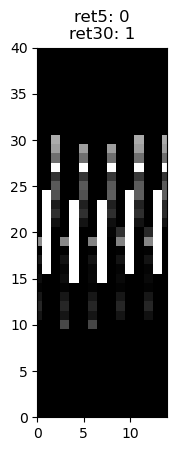

In [66]:
# Display one image
record_cnt = 5  # default: 5
pred_cnt = 30
curr_idx = 84995
snapshot_df = df1.iloc[curr_idx - record_cnt:curr_idx + pred_cnt]
entry = single_image(snapshot_df, record_cnt)
display_image(entry)

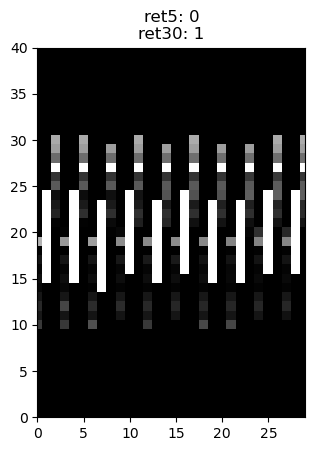

In [67]:
# Display one image
record_cnt = 10  # default: 5
pred_cnt = 30
curr_idx = 84995
snapshot_df = df1.iloc[curr_idx - record_cnt:curr_idx + pred_cnt]
entry = single_image(snapshot_df, record_cnt)
display_image(entry)

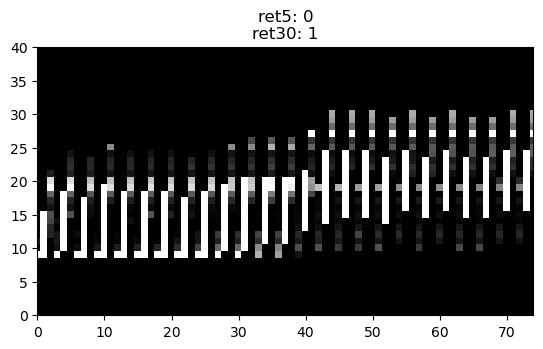

In [68]:
# Display one image
record_cnt = 25  # default: 5
pred_cnt = 30
curr_idx = 84995
snapshot_df = df1.iloc[curr_idx - record_cnt:curr_idx + pred_cnt]
entry = single_image(snapshot_df, record_cnt)
display_image(entry)

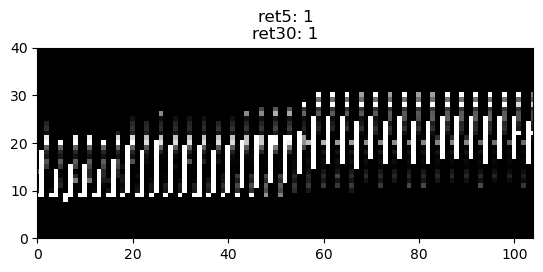

In [69]:
# Display one image
record_cnt = 35  # default: 5
pred_cnt = 30
curr_idx = 85000
snapshot_df = df1.iloc[curr_idx - record_cnt:curr_idx + pred_cnt]
entry = single_image(snapshot_df, record_cnt)
display_image(entry)

# Models

In [7]:

def generate_dataset(df, record_cnt=5):
    '''Generate dataset of entries from df'''
    dataset = []
    for i in tqdm(range(len(df) - (record_cnt + 30))):
        entry = single_image(df.iloc[i:i + (record_cnt + 30)], record_cnt)
        dataset.append(entry)
    return dataset


def save_report(df: pd.DataFrame, model_name='', balance=False, task_type='binary'):
    '''Save report to csv file'''
    timestamp = datetime.now().strftime("%Y%m%d_%H%M")
    balance_tag = "balanced" if balance else "unbalanced"
    fname = f"reports/{task_type}_{model_name}_{balance_tag}_{timestamp}.csv"
    df.to_csv(fname, index=True)
    print(f"Report saved to: {fname}")


### Traditional ML

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC  
from sklearn.ensemble import HistGradientBoostingClassifier  
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
import time

def traditional_ml_pipeline(entries, balance=False):
    '''
    多个传统机器学习模型训练和评估
    :param entries: 生成的图像数据集
    :param balance: 是否进行类别平衡处理
    :return: 训练和评估结果的 DataFrame
    
    entries: list of tuples, each tuple contains (image, ret5, ret30)
    '''
    # 数据准备
    X = np.array([entry[0] for entry in entries])
    
    # default label: ret5
    y = np.array([1 if entry[1] == 1 else 0 for entry in entries])  # 确保二分类标签为0/1
    X_flat = X.reshape(X.shape[0], -1)
    
    # 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_flat)
    
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )
    
    # 类别平衡处理
    if balance:
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # 模型列表
    # 适用于大样本
    models = [
        ('Logistic Regression (SGD)', 
        SGDClassifier(
            loss='log_loss',
            penalty='l2',
            class_weight='balanced',
            max_iter=1000,
            tol=1e-3,
            n_jobs=-1)),  # 启用并行
        
        ('Approx KNN', 
        KNeighborsClassifier(
            n_neighbors=100,  # 增大邻居数
            algorithm='kd_tree',  # 使用树结构加速
            leaf_size=50,
            n_jobs=-1)),
        
        ('Linear SVM', 
        LinearSVC(  # 使用线性核
            class_weight='balanced',
            dual=False,  # 大数据时用primal优化
            max_iter=500,
            tol=1e-3,
            intercept_scaling=10)), 
        
        ('HistGBM', 
        HistGradientBoostingClassifier(
            max_iter=200,
            learning_rate=0.05,
            max_depth=5,
            min_samples_leaf=100,
            l2_regularization=1.0,
            early_stopping=True,
            scoring='f1',
            n_iter_no_change=10,
            random_state=42,
            verbose=0)),
        
        ('XGBoost', 
        XGBClassifier(
            objective='binary:logistic',
            n_estimators=300,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            tree_method='approx',  # 近似算法
            predictor='gpu_predictor',  # GPU加速
            scale_pos_weight=np.sum(y==0)/np.sum(y==1),
            n_jobs=-1))
    ]
    
    # 训练评估
    reports = []
    results = []
    for name, model in models:
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        reports.append(report)
        result = {
            'Model': name,
            'Accuracy': report['accuracy'],
            'Precision': report['1']['precision'],
            'Recall': report['1']['recall'],
            'F1': report['1']['f1-score']
        }
        results.append(result)
        print(f"\n--- {name} ---")
        print("Time elapsed: ", time.time() - start_time, " (s)")
        print(result)
        
    result_df = pd.DataFrame(results)
    result_df.set_index('Model', inplace=True)
    result_df.sort_values('F1', ascending=False, inplace=True)
    save_report(result_df.sort_values('F1', ascending=False), model_name='Traditional', balance=balance, task_type='binary')
    return pd.DataFrame(results)


/home/qbzhou21/.conda/envs/LOB-CNN/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [14]:
dataset = generate_dataset(df1.iloc[:10000, :], record_cnt=5)

100%|██████████| 9965/9965 [00:13<00:00, 735.68it/s]


In [15]:
df_results = traditional_ml_pipeline(entries=dataset, balance=False)
print(df_results.sort_values('F1', ascending=False))


--- Logistic Regression (SGD) ---
Time elapsed:  1.830981969833374  (s)
{'Model': 'Logistic Regression (SGD)', 'Accuracy': 0.5363773206221776, 'Precision': 0.363265306122449, 'Recall': 0.5426829268292683, 'F1': 0.4352078239608802}

--- Approx KNN ---
Time elapsed:  1.3548681735992432  (s)
{'Model': 'Approx KNN', 'Accuracy': 0.6668339187155042, 'Precision': 0.4, 'Recall': 0.024390243902439025, 'F1': 0.04597701149425287}


/home/qbzhou21/.conda/envs/LOB-CNN/lib/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



--- Linear SVM ---
Time elapsed:  20.268060207366943  (s)
{'Model': 'Linear SVM', 'Accuracy': 0.6081284495735073, 'Precision': 0.43001119820828665, 'Recall': 0.5853658536585366, 'F1': 0.49580374435119434}


/home/qbzhou21/.conda/envs/LOB-CNN/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/qbzhou21/.conda/envs/LOB-CNN/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/qbzhou21/.conda/envs/LOB-CNN/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()


--- HistGBM ---
Time elapsed:  0.7189054489135742  (s)
{'Model': 'HistGBM', 'Accuracy': 0.6708479678876066, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0}

--- XGBoost ---
Time elapsed:  6.590352773666382  (s)
{'Model': 'XGBoost', 'Accuracy': 0.7972905168088309, 'Precision': 0.7, 'Recall': 0.6722560975609756, 'F1': 0.6858475894245724}
Report saved to: reports/binary_Traditional_unbalanced_20250320_0211.csv
                       Model  Accuracy  Precision    Recall        F1
4                    XGBoost  0.797291   0.700000  0.672256  0.685848
2                 Linear SVM  0.608128   0.430011  0.585366  0.495804
0  Logistic Regression (SGD)  0.536377   0.363265  0.542683  0.435208
1                 Approx KNN  0.666834   0.400000  0.024390  0.045977
3                    HistGBM  0.670848   0.000000  0.000000  0.000000


### CNN

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split


class FinanceDataset(Dataset):
    def __init__(self, entries, task_type='binary', target='ret5'):
        # 确保数据仍留在 CPU
        images = np.stack([x[0] for x in entries], axis=0).astype(np.float32) / 255.0
        self.images = torch.tensor(images) 
        
        if task_type == 'binary':
            self.labels = torch.tensor([1 if x[1 if target=='ret5' else 2] == 1 else 0 for x in entries], dtype=torch.float32)
        else:
            self.labels = torch.tensor([x[1 if target=='ret5' else 2] + 1 for x in entries], dtype=torch.long)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # 在 DataLoader 里，动态转换到 GPU
        return self.images[idx].unsqueeze(0), self.labels[idx]

def create_dataloaders(entries, batch_size=128, target='ret5', num_workers=4):
    dataset = FinanceDataset(entries, task_type='binary', target=target)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_set, val_set = random_split(dataset, [train_size, val_size])
    
    # 优化 DataLoader，不要预加载进 GPU
    train_loader = DataLoader(
        train_set, batch_size=batch_size, shuffle=True,
        num_workers=num_workers, pin_memory=torch.cuda.is_available()
    )
    
    val_loader = DataLoader(
        val_set, batch_size=batch_size, shuffle=False,
        num_workers=num_workers, pin_memory=torch.cuda.is_available()
    )
    
    return train_loader, val_loader


In [3]:
# Model
class BinaryCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            # Layer 1: [1, 41, 15] -> [256, 20, 7]
            nn.Conv2d(1, 256, kernel_size=(6,6), stride=(2,1), padding=(2,2)),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
            
            # Layer 2: [256, 20, 7] -> [512, 11, 8]
            nn.Conv2d(256, 512, kernel_size=(2,2), stride=(1,1), padding=(1,1)),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=(2,1), stride=(2,1)),
            
            # Layer 3: [512, 11, 8] -> [1024, 6, 9]
            nn.Conv2d(512, 1024, kernel_size=(2,2), stride=(1,1), padding=(1,1)),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.1),
            nn.MaxPool2d(kernel_size=(2,1), stride=(2,1)),
            nn.Dropout(0.5)
        )
        
        # 自动计算全连接层输入尺寸
        with torch.no_grad():
            dummy = torch.zeros(1, 1, 41, 15)  # 输入尺寸假设
            dummy = self.features(dummy)
            self.fc_in = dummy.view(1, -1).size(1)
        
            
        self.classifier = nn.Sequential(
            nn.Linear(self.fc_in, 40960),
            nn.ReLU(),
            nn.Linear(40960, 1)  # 移除 nn.Sigmoid(), 因为损失函数nn.BCEWithLogitsLoss()
        )
        
        # print the output size
        print(f"Flattened size: {self.fc_in}")  # 27648 = 1024*3*9
        
        # 参数初始化
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                # Kaiming Initializer
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='leaky_relu')

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [72]:

def train_model(model, train_loader, val_loader, lr=1e-5, epochs=50, target='ret5'):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # CUDA out of memory
    # device = torch.device('cpu')
    print(f"Using device: {device}")
    model.to(device)

    # Choose loss function
    criterion = nn.BCEWithLogitsLoss() if isinstance(model, BinaryCNN) else nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_acc = 0.0

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        total_train_samples = 0

        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]", unit="batch")
        for inputs, labels in train_pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            if isinstance(model, BinaryCNN):
                labels = labels.unsqueeze(1)  # Ensure proper shape for BCEWithLogitsLoss

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            batch_size = inputs.size(0)
            train_loss += loss.item() * batch_size
            total_train_samples += batch_size

            train_pbar.set_postfix(loss=f"{loss.item():.4f}")


        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]", unit="batch")
        with torch.no_grad():
            for inputs, labels in val_pbar:
                inputs, labels = inputs.to(device), labels.to(device)
                if isinstance(model, BinaryCNN):
                    labels = labels.unsqueeze(1)  # 让 labels 变成 [batch_size, 1]
                
                outputs = model(inputs)
                
                loss = criterion(outputs, labels if isinstance(model, BinaryCNN) else labels)
                val_loss += loss.item() * inputs.size(0)

                if isinstance(model, BinaryCNN):
                    preds = (torch.sigmoid(outputs) > 0.5).long()
                else:
                    preds = torch.argmax(outputs, dim=1)
                
                correct += (preds == labels).sum().item()
                total += labels.size(0)

                val_pbar.set_postfix(
                    acc=f"{correct/total:.2%}",
                    loss=f"{loss.item():.4f}"
                )

        # Save Best Model
        epoch_acc = correct / total
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            torch.save(model.state_dict(), f"best_model_{target}.pth")

    print(f"Best Validation Accuracy: {best_acc:.2%}")


In [11]:
dataset = generate_dataset(df1.iloc[:10000, :], record_cnt=5)

# 分析标签分布
labels = [entry[1] for entry in dataset]  # 只取ret5标签
print(f"Label distribution: \n{pd.Series(labels).value_counts(normalize=True)}")


  0%|          | 0/9965 [00:00<?, ?it/s]

100%|██████████| 9965/9965 [00:13<00:00, 747.31it/s]

Label distribution: 
0    0.670948
1    0.329052
Name: proportion, dtype: float64


In [73]:
model = BinaryCNN()
train_loader, val_loader = create_dataloaders(entries=dataset, batch_size=16, target='ret5')
train_loader.dataset[0][0].shape

Flattened size: 27648


NameError: name 'dataset' is not defined

In [13]:
# 开始训练
train_model(model, train_loader, val_loader,lr=1e-5, epochs=5, target='ret5')

Using device: cuda


Epoch 5/5 [Val]: 100%|██████████| 125/125 [00:02<00:00, 62.10batch/s, acc=68.39%, loss=0.4099]

Best Validation Accuracy: 68.69%


#### 问题

**CUDA out of memory**

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.22 GiB. GPU 0 has a total capacity of 23.69 GiB of which 1.76 GiB is free. Including non-PyTorch memory, this process has 21.92 GiB memory in use. Of the allocated memory 21.55 GiB is allocated by PyTorch, and 57.07 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

**减小 batch_size**

原：batch_size = 128

In [25]:
# 清理缓存
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


#### 预测

- 在测试集上

- 与传统机器学习保持相同的数据划分逻辑

In [11]:
from sklearn.model_selection import train_test_split


def create_cnn_dataloaders(entries, batch_size=128, target='ret5', num_workers=4, test_size=0.2):
    """创建训练、验证、测试集DataLoader，保持与传统方法相同的划分逻辑"""
 
    # 获取与传统方法相同的索引划分
    X_indices = np.arange(len(entries))
    y = np.array([1 if entry[1] == 1 else 0 for entry in entries])  # ret5
    
    # 第一次划分：训练+验证 与 测试集
    X_train_val_idx, X_test_idx, _, _ = train_test_split(
        X_indices, y, 
        test_size=test_size, 
        stratify=y, 
        random_state=42
    )
    
    # 第二次划分：训练集与验证集
    X_train_idx, X_val_idx = train_test_split(
        X_train_val_idx,
        test_size=0.25,  # 0.25 * 0.8 = 0.2
        stratify=y[X_train_val_idx],
        random_state=42
    )
    
    # 创建子数据集
    train_dataset = torch.utils.data.Subset(FinanceDataset(entries, target=target), X_train_idx)
    val_dataset = torch.utils.data.Subset(FinanceDataset(entries, target=target), X_val_idx)
    test_dataset = torch.utils.data.Subset(FinanceDataset(entries, target=target), X_test_idx)
    
    # 创建DataLoader
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True,
        num_workers=num_workers, pin_memory=torch.cuda.is_available()
    )
    
    val_loader = DataLoader(
        val_dataset, batch_size=batch_size,
        num_workers=num_workers, pin_memory=torch.cuda.is_available()
    )
    
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size,
        num_workers=num_workers, pin_memory=torch.cuda.is_available()
    )
    
    return train_loader, val_loader, test_loader

# 新增测试集预测函数
def cnn_predict(model, test_loader, device='cuda'):
    """在测试集上进行预测，返回概率和标签"""
    model.eval()
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs).cpu().numpy().flatten()
            
            all_probs.extend(probs.tolist())
            all_labels.extend(labels.cpu().numpy().tolist())
    
    return np.array(all_probs), np.array(all_labels)

# 新增评估函数
def evaluate_cnn(y_true, y_prob, threshold=0.5):
    """计算评估指标，与传统机器学习结果可比"""
    from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
    
    y_pred = (y_prob >= threshold).astype(int)
    
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_prob),
        'f1': f1_score(y_true, y_pred)
    }


In [ ]:

dataset = generate_dataset(df1.iloc[:10000, :], record_cnt=5)
labels = [entry[1] for entry in dataset]  # 只取ret5标签
print(f"Label distribution: \n{pd.Series(labels).value_counts(normalize=True)}")  
train_loader, val_loader, test_loader = create_cnn_dataloaders(dataset, batch_size=16, target='ret5')

model = BinaryCNN()
train_model(model, train_loader, val_loader, lr=1e-6, epochs=30, target='ret5')

# 清理缓存
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

test_probs, test_labels = cnn_predict(model, test_loader)

# 评估结果
metrics = evaluate_cnn(test_labels, test_probs)
print(f"CNN测试集结果：")
print(f"准确率：{metrics['accuracy']:.2%}")
print(f"AUC：{metrics['roc_auc']:.3f}")
print(f"F1分数：{metrics['f1']:.3f}")

  0%|          | 0/9965 [00:00<?, ?it/s]

100%|██████████| 9965/9965 [00:13<00:00, 755.40it/s]


Label distribution: 
0    0.670948
1    0.329052
Name: proportion, dtype: float64
Flattened size: 27648
Using device: cuda


Epoch 30/30 [Val]: 100%|██████████| 125/125 [00:01<00:00, 63.85batch/s, acc=67.03%, loss=0.8438]


Best Validation Accuracy: 68.04%
CNN测试集结果：
准确率：66.23%
AUC：0.679
F1分数：0.501
